<a href="https://colab.research.google.com/github/pranauww/mlsn_gm3_workshop/blob/main/data_preprocessing_and_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Data Preprocessing & Splitting for Machine Learning – In-Depth Workshop

Welcome! In this tutorial, we're going to explore **real-world preprocessing techniques** in detail.

We'll use the Titanic dataset, which contains data about passengers and whether they survived the Titanic disaster.

You’ll learn how to:
- Explore data using statistics and visualizations
- Handle missing values in smarter ways
- Detect and manage outliers
- Encode categorical data with more awareness
- Scale and engineer features
- Split data into training, validation, and test sets appropriately

These are essential skills for anyone working in machine learning, especially in supervised learning problems.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔍 First Look at the Data

We’ll begin by checking the data types, shapes, and completeness of our dataset. This gives us an idea of how messy or clean it is.

Then we'll explore basic distributions, class balance, and other patterns.

In [ ]:
# Display basic information
df.info()

# Summary statistics
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


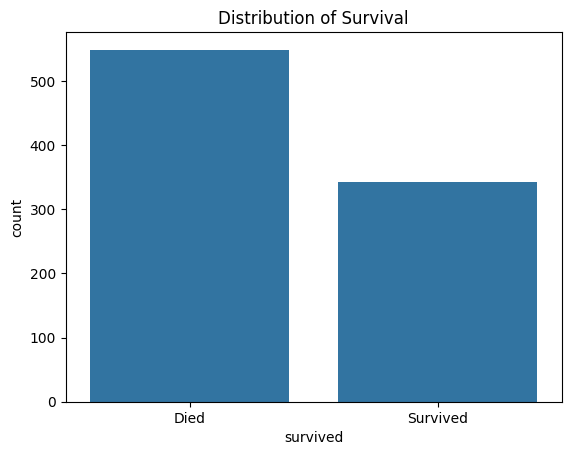

Survival Rate: 0.3838383838383838


In [ ]:
sns.countplot(data=df, x='survived')
plt.title('Distribution of Survival')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

print("Survival Rate:", df['survived'].mean())

## 📊 Exploratory Data Analysis (EDA)

EDA helps us uncover patterns, detect outliers, and understand relationships between features and the target.

Let’s visualize how features like **age**, **sex**, **class**, and **fare** relate to survival.

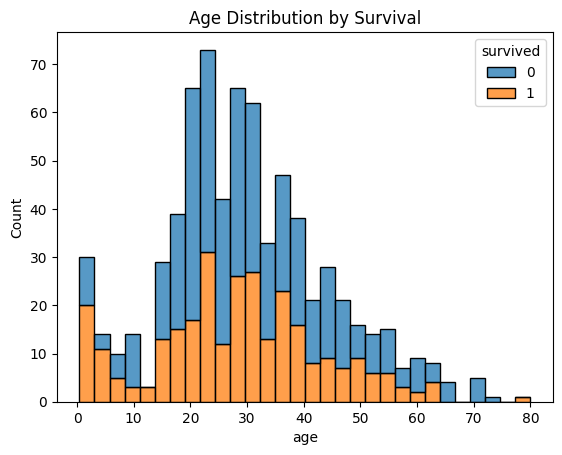

In [ ]:
# Age distribution by survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()

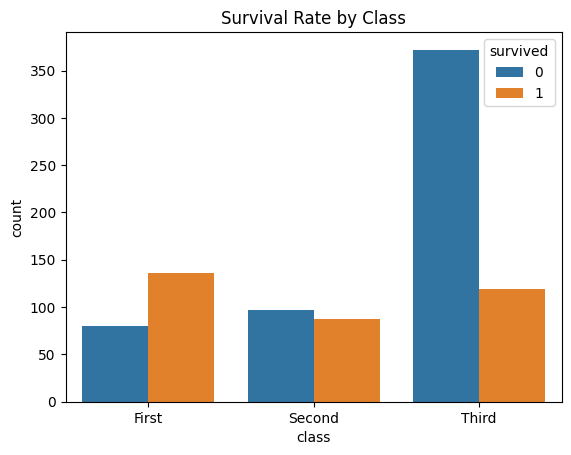

In [ ]:
# Survival by class
sns.countplot(data=df, x='class', hue='survived')
plt.title("Survival Rate by Class")
plt.show()

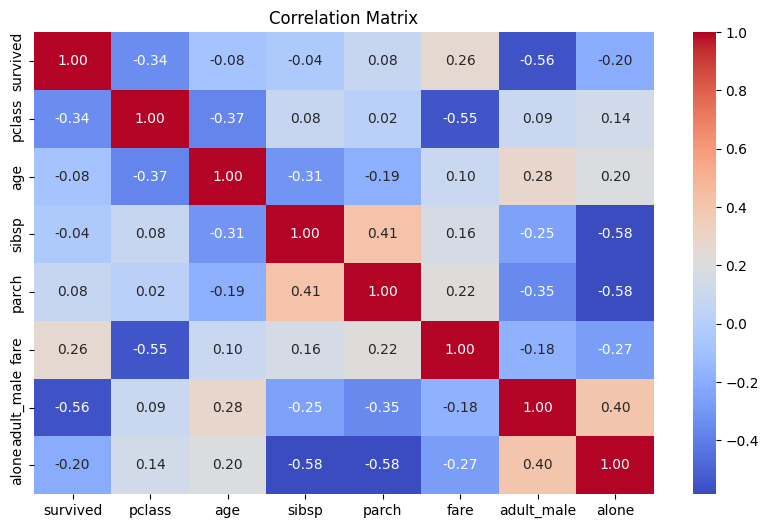

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 🧹 Handling Missing Data

Instead of dropping missing data blindly, let’s explore smarter strategies:

- Fill **age** using a regression or median value based on other features
- Fill **embarked** using the most common port
- Drop **deck** due to too much missing data

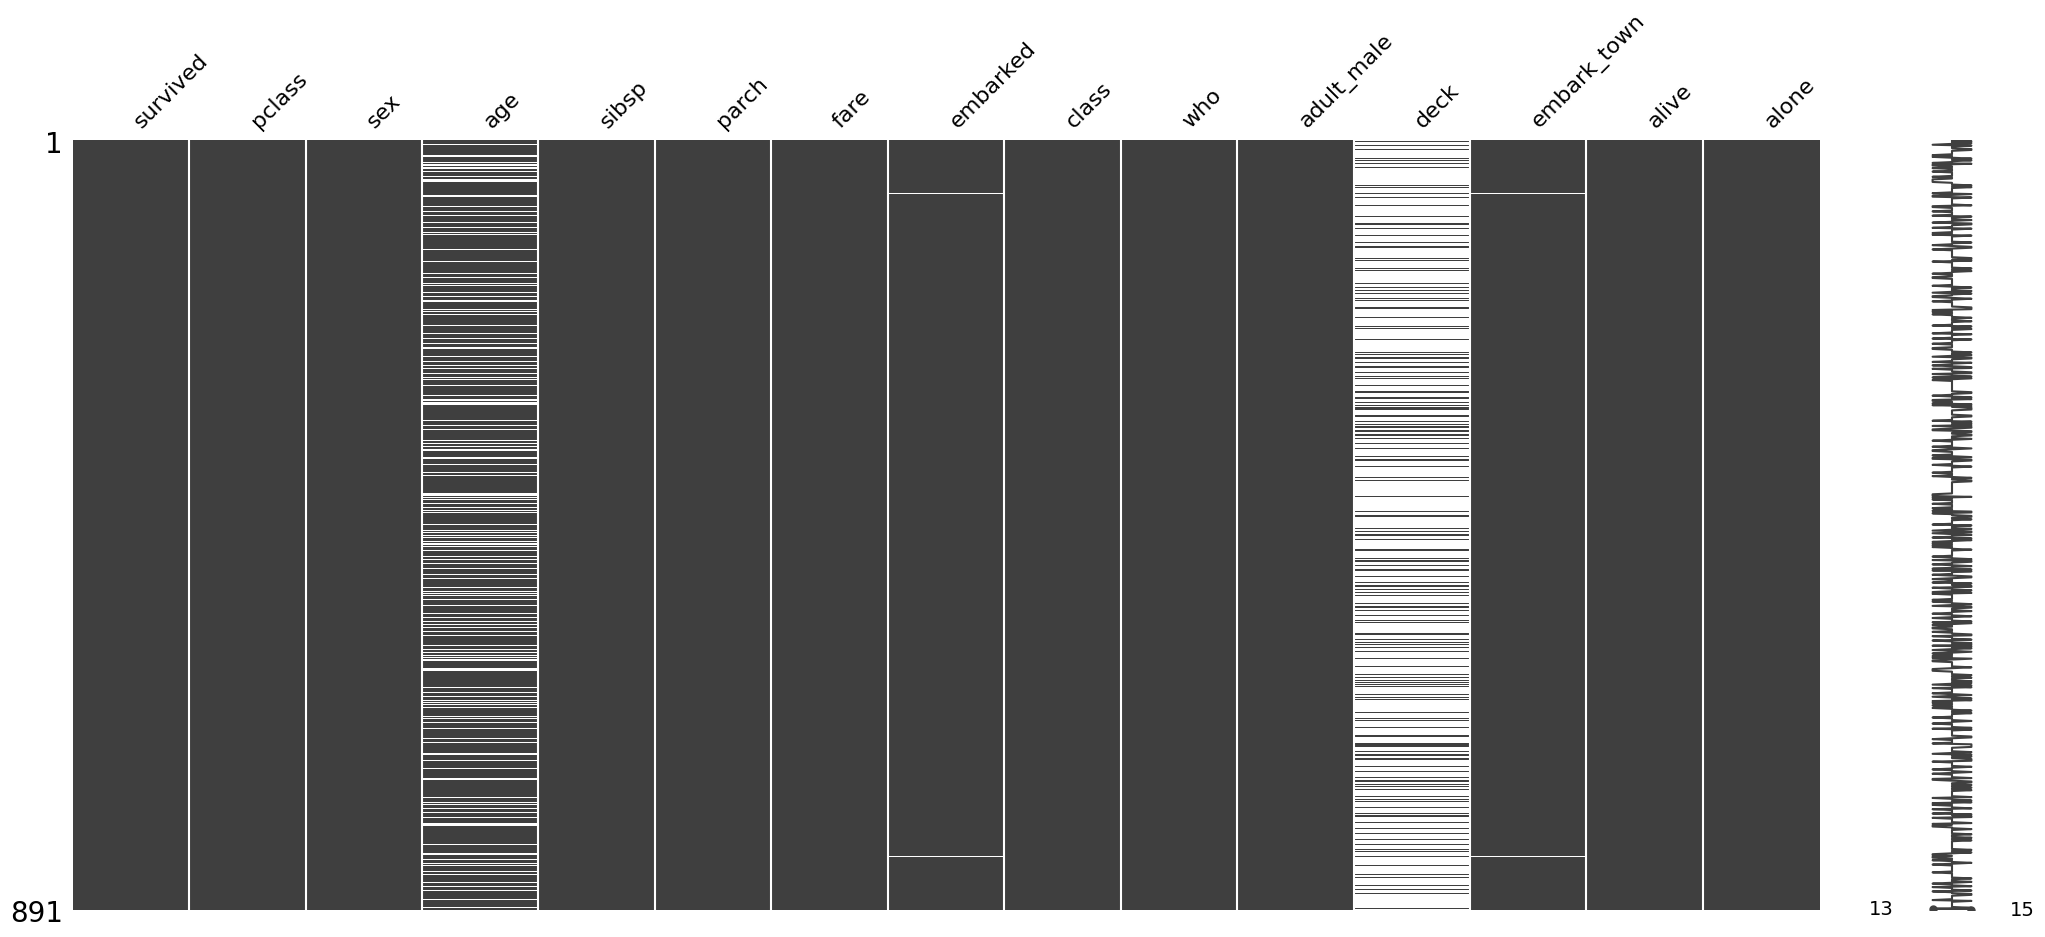

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Visualizing missing values
import missingno as msno
msno.matrix(df)
plt.show()

# Check nulls
df.isnull().sum()

In [ ]:
# Fill 'age' with median by class and sex
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

# Fill 'embarked' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck'
df = df.drop(columns='deck')

# Double check
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## 🧪 Feature Engineering

We’ll now engineer new features and transform existing ones to better capture relationships in the data.

For example:
- Convert **'sex'**, **'embarked'**, and **'class'** into numeric values
- Create a **'family_size'** feature from sibsp + parch
- Bin the **'fare'** feature

In [ ]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked', 'class'])

# Create new feature: family size
df['family_size'] = df['sibsp'] + df['parch']

# Bin fare
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=False)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,family_size,fare_bin
0,0,3,0,22.0,1,0,7.2500,man,True,Southampton,no,False,False,False,True,False,False,True,1,0
1,1,1,1,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False,True,False,False,True,False,False,1,3
2,1,3,1,26.0,0,0,7.9250,woman,False,Southampton,yes,True,False,False,True,False,False,True,0,1
3,1,1,1,35.0,1,0,53.1000,woman,False,Southampton,yes,False,False,False,True,True,False,False,1,3
4,0,3,0,35.0,0,0,8.0500,man,True,Southampton,no,True,False,False,True,False,False,True,0,1


## 📏 Scaling Numeric Features

We use **StandardScaler** to normalize the distribution of numeric features like **age**, **fare**, and **family size**.

This helps algorithms that are sensitive to feature magnitude, like SVM and KNN.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fare', 'family_size']] = scaler.fit_transform(df[['age', 'fare', 'family_size']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,family_size,fare_bin
0,0,3,0,-0.534891,1,0,-0.502445,man,True,Southampton,no,False,False,False,True,False,False,True,0.059160,0
1,1,1,1,0.668392,1,0,0.786845,woman,False,Cherbourg,yes,False,True,False,False,True,False,False,0.059160,3
2,1,3,1,-0.234070,0,0,-0.488854,woman,False,Southampton,yes,True,False,False,True,False,False,True,-0.560975,1
3,1,1,1,0.442776,1,0,0.420730,woman,False,Southampton,yes,False,False,False,True,True,False,False,0.059160,3
4,0,3,0,0.442776,0,0,-0.486337,man,True,Southampton,no,True,False,False,True,False,False,True,-0.560975,1


## ✂️ Train-Test-Validation Split

We split the data as follows:
- **Training set (60%)** – used to train the model
- **Validation set (20%)** – used for tuning and model selection
- **Test set (20%)** – used to evaluate final model performance

This ensures our model doesn’t overfit or underperform.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['survived', 'who', 'alive', 'adult_male', 'embark_town', 'alone'])
y = df['survived']

# First split: Train+Val (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Second split: Train (60%) and Val (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (534, 14)
Validation set: (178, 14)
Test set: (179, 14)


# ✅ Recap

In this enhanced workshop, you learned:

- How to explore and visualize data
- Smart strategies to fill missing values
- How to engineer and scale features
- How to one-hot encode categorical variables
- How to perform meaningful data splits for training, validation, and testing

These steps form the **foundation of any successful machine learning pipeline**.

You’re now ready to move on to building and tuning ML models!